In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [ ]:
model = tf.keras.Sequential(keras.layers.Dense(units=1, input_shape=[1]))

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0],dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0],dtype=float)

In [ ]:
model.fit(xs, ys, epochs=500)

In [ ]:
print(model.predict([10.0]))

[[18.978989]]


In [2]:
learning_rate=0.01
epochs = 200
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

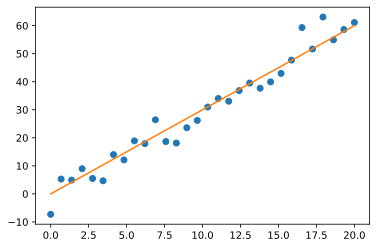

In [4]:
plt.plot(train_x,train_y,'o')
plt.plot(train_x, 3* train_x)
plt.show()

epoch: 0000 c=64.681190 w=2.126177 b=-0.385552
epoch: 0020 c=7.518531 w=3.078752 b=-0.394241
epoch: 0040 c=7.480567 w=3.084184 b=-0.478588
epoch: 0060 c=7.446342 w=3.089339 b=-0.558647
epoch: 0080 c=7.415484 w=3.094233 b=-0.634634
epoch: 0100 c=7.387661 w=3.098877 b=-0.706757
epoch: 0120 c=7.362573 w=3.103285 b=-0.775213
epoch: 0140 c=7.339952 w=3.107469 b=-0.840188
epoch: 0160 c=7.319553 w=3.111441 b=-0.901859
epoch: 0180 c=7.301157 w=3.115210 b=-0.960393


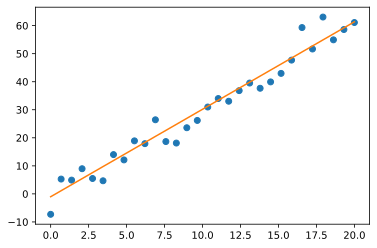

In [14]:
tf.compat.v1.disable_eager_execution()
# create variables for X, Y, W, B
X = tf.compat.v1.placeholder(tf.float32)  
Y = tf.compat.v1.placeholder(tf.float32)
W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')
pred = X*W+B
# pred = tf.add(tf.multiply(X,W),B)

# define cost function
cost = tf.reduce_sum((pred - Y)**2/(2*n_samples))

# define optmizer
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sesh:
  sesh.run(init)

  for epoch in range(epochs):
    for x, y in zip(train_x, train_y):
      sesh.run(opt, feed_dict={X:x, Y:y})
    if not epoch % 20:
      c = sesh.run(cost, feed_dict={X: train_x, Y: train_y})
      w = sesh.run(W)
      b = sesh.run(B)
      print(f'epoch: {epoch:04d} c={c:4f} w={w:4f} b={b:4f}')
  weight = sesh.run(W)
  bias = sesh.run(B)
  plt.plot(train_x, train_y,'o')
  plt.plot(train_x, weight*train_x + bias)
  plt.show()